# ASL Dataset walk through

## Importing Libraries

In [1]:
import os
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from tensorflow.keras import utils, optimizers
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

import cv2

2022-11-23 20:34:54.821987: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-23 20:34:54.908198: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-23 20:34:55.421385: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-23 20:34:55.421439: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

## Reading data

In [2]:
data_dir = '../data/asl-alphabet/asl_alphabet_train/asl_alphabet_train'

In [3]:
data_dir_test = '../data/asl-alphabet/asl_alphabet_test/asl_alphabet_test/'

In [4]:
train_samples = sum([len(files) for r, d, files in os.walk(data_dir)])

In [5]:
num_classes = len(os.listdir(data_dir))

In [6]:
classes = sorted(os.listdir(data_dir))

In [7]:
print(classes)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [8]:
print(len(classes))

29


In [9]:
samples_per_class = {}

for data_class in classes:
    path = os.path.join(data_dir,data_class)
    num_samples_per_class = len(os.listdir(path))
    samples_per_class[data_class] = num_samples_per_class

In [10]:
samples_per_class

{'A': 3000,
 'B': 3000,
 'C': 3000,
 'D': 3000,
 'E': 3000,
 'F': 3000,
 'G': 3000,
 'H': 3000,
 'I': 3000,
 'J': 3000,
 'K': 3000,
 'L': 3000,
 'M': 3000,
 'N': 3000,
 'O': 3000,
 'P': 3000,
 'Q': 3000,
 'R': 3000,
 'S': 3000,
 'T': 3000,
 'U': 3000,
 'V': 3000,
 'W': 3000,
 'X': 3000,
 'Y': 3000,
 'Z': 3000,
 'del': 3000,
 'nothing': 3000,
 'space': 3000}

## Displaying Images

18
../data/asl-alphabet/asl_alphabet_train/asl_alphabet_train/S/S579.jpg


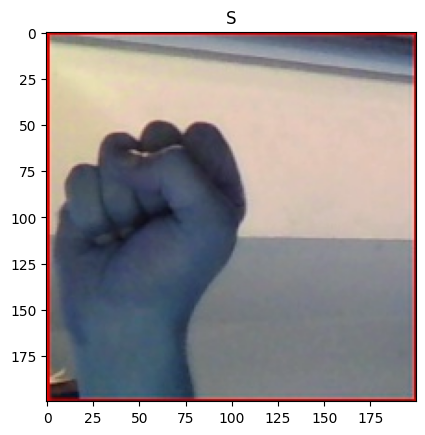

In [11]:
class_index = random.randint(0, num_classes-1)
print(class_index)
data_class = classes[class_index]
img_num = random.randint(1,3000)
img_path = os.path.join(data_dir,data_class+"/"+data_class+f"{img_num}"+".jpg")
img = cv2.imread(img_path)
print(img_path)

plt.imshow(img)
plt.title(data_class)
plt.show()

## Preparing the data

In [12]:
def prepare_data(data_path, classes, num_classes):
    images = []
    labels = []

    for i in range(num_classes):
        class_path = os.path.join(data_path,classes[i])
        for img_name in os.listdir(class_path):
            img = cv2.imread(os.path.join(class_path,img_name))
            img = cv2.resize(img, (32,32))
            images.append(img)
            labels.append(i)

    return images, labels

In [13]:
X,y = prepare_data(data_dir, classes, num_classes)

In [14]:
len(X), len(y)

(87000, 87000)

In [15]:
y[2995:3005]

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

## Data visualisation

In [16]:
def plot_images_all_classes(num_classes, classes):
    figure = plt.figure()
    plt.figure(figsize=(16,5))

    for i in range(num_classes):
        plt.subplot(3,10,i+1)
        plt.xticks([])
        plt.yticks([])
        data_class = classes[i]
        img_num = random.randint(1,3000)
        img_path = os.path.join(data_dir,data_class+"/"+data_class+f"{img_num}"+".jpg")
        img = plt.imread(img_path)
        img = plt.imshow(img)
        plt.xlabel(data_class)
    plt.plot()

<Figure size 640x480 with 0 Axes>

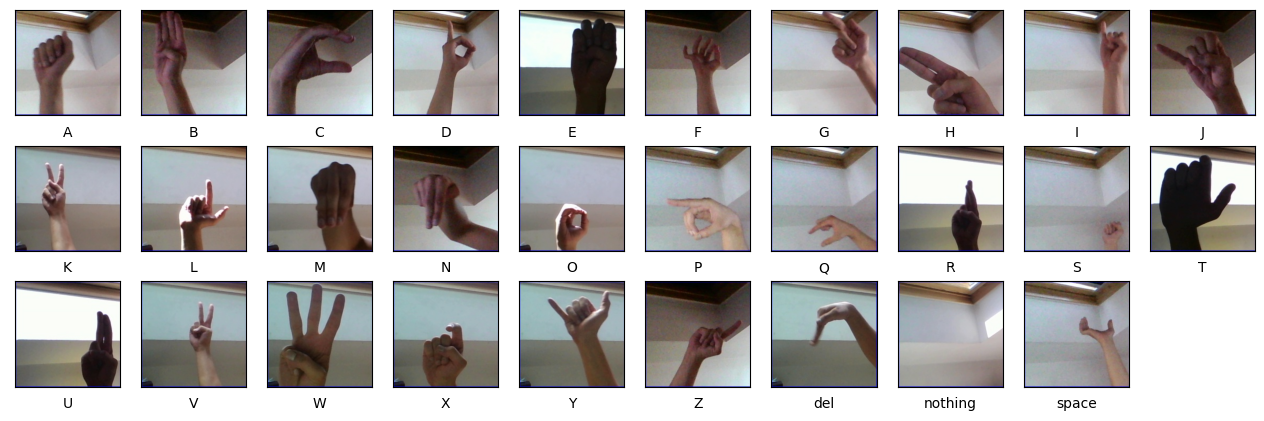

In [17]:
plot_images_all_classes(num_classes, classes)

## Data Preprocessing

In [18]:
def process_data(X_data ,y_data):
    X_data = np.array(X_data)
    X_data = X_data.astype('float32')/255.0

    y_data = utils.to_categorical(y_data)
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

    return X_train, X_test, y_train, y_test

In [19]:
X_train, X_test, y_train, y_test = process_data(X, y)

In [20]:
X_train.shape, y_train.shape

((69600, 32, 32, 3), (69600, 29))

## Creating Model

In [21]:
batch = 32
epochs = 15
learning_rate = 0.001

In [22]:
def create_model():
    model = Sequential()

    model.add(Conv2D(64, (3,3), padding='same', input_shape=(32,32,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [23]:
model = create_model()
optimizer = optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

2022-11-23 20:35:37.148297: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 20:35:37.198959: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 20:35:37.199076: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 20:35:37.200351: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                        

In [25]:
history = model.fit(X_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.2, shuffle = True, verbose=1)

Epoch 1/15


2022-11-23 20:35:38.529726: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2022-11-23 20:35:39.420832: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8600
2022-11-23 20:35:40.020609: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-23 20:35:40.145041: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-11-23 20:35:40.149078: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fdbc1448ff0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-11-23 20:35:40.149092: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor devi

1740/1740 [==============================] - 9s 3ms/step - loss: 0.6285 - accuracy: 0.8129 - val_loss: 0.9776 - val_accuracy: 0.7850
Epoch 2/15
1740/1740 [==============================] - 6s 3ms/step - loss: 0.1363 - accuracy: 0.9570 - val_loss: 0.2350 - val_accuracy: 0.9315
Epoch 3/15
1740/1740 [==============================] - 6s 3ms/step - loss: 0.0951 - accuracy: 0.9730 - val_loss: 0.1940 - val_accuracy: 0.9545
Epoch 4/15
1740/1740 [==============================] - 6s 3ms/step - loss: 0.0697 - accuracy: 0.9808 - val_loss: 0.1248 - val_accuracy: 0.9670
Epoch 5/15
1740/1740 [==============================] - 6s 3ms/step - loss: 0.0673 - accuracy: 0.9835 - val_loss: 0.9537 - val_accuracy: 0.8550
Epoch 6/15
1740/1740 [==============================] - 6s 3ms/step - loss: 0.0585 - accuracy: 0.9857 - val_loss: 0.5487 - val_accuracy: 0.8984
Epoch 7/15
1740/1740 [==============================] - 6s 3ms/step - loss: 0.0547 - accuracy: 0.9873 - val_loss: 0.1120 - val_accuracy: 0.9710
Epo

## Model Evalution

In [26]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

544/544 [==============================] - 1s 1ms/step - loss: 0.0070 - accuracy: 0.9983
Test accuracy: 0.998275876045227
Test loss: 0.0069928597658872604


## Preparing test data

In [27]:
num_test_data = len(os.listdir(data_dir_test))
num_test_data

28

In [28]:
actual_test_truth = os.listdir(data_dir_test)

def prepare_test(data_path):
    images = []
    for img_name in actual_test_truth:
        img = cv2.imread(os.path.join(data_path,img_name))
        img = cv2.resize(img, (32,32))
        img = np.array(img)
        img = img.astype('float32')/255.0
        img = np.expand_dims(img, axis=0)
        images.append(img)

    return images

## Prediction on test dataset

In [29]:
actual_test_truth

['I_test.jpg',
 'B_test.jpg',
 'Y_test.jpg',
 'nothing_test.jpg',
 'F_test.jpg',
 'M_test.jpg',
 'C_test.jpg',
 'D_test.jpg',
 'X_test.jpg',
 'V_test.jpg',
 'S_test.jpg',
 'J_test.jpg',
 'Q_test.jpg',
 'W_test.jpg',
 'H_test.jpg',
 'E_test.jpg',
 'Z_test.jpg',
 'K_test.jpg',
 'P_test.jpg',
 'U_test.jpg',
 'T_test.jpg',
 'G_test.jpg',
 'R_test.jpg',
 'L_test.jpg',
 'O_test.jpg',
 'space_test.jpg',
 'N_test.jpg',
 'A_test.jpg']

In [30]:
test_data = prepare_test(data_dir_test)
prediction = []
for i in range(num_test_data):
    prediction.append(np.argmax(model.predict(test_data[i])))

1/1 [==============================] - 0s 12ms/step


<Figure size 640x480 with 0 Axes>

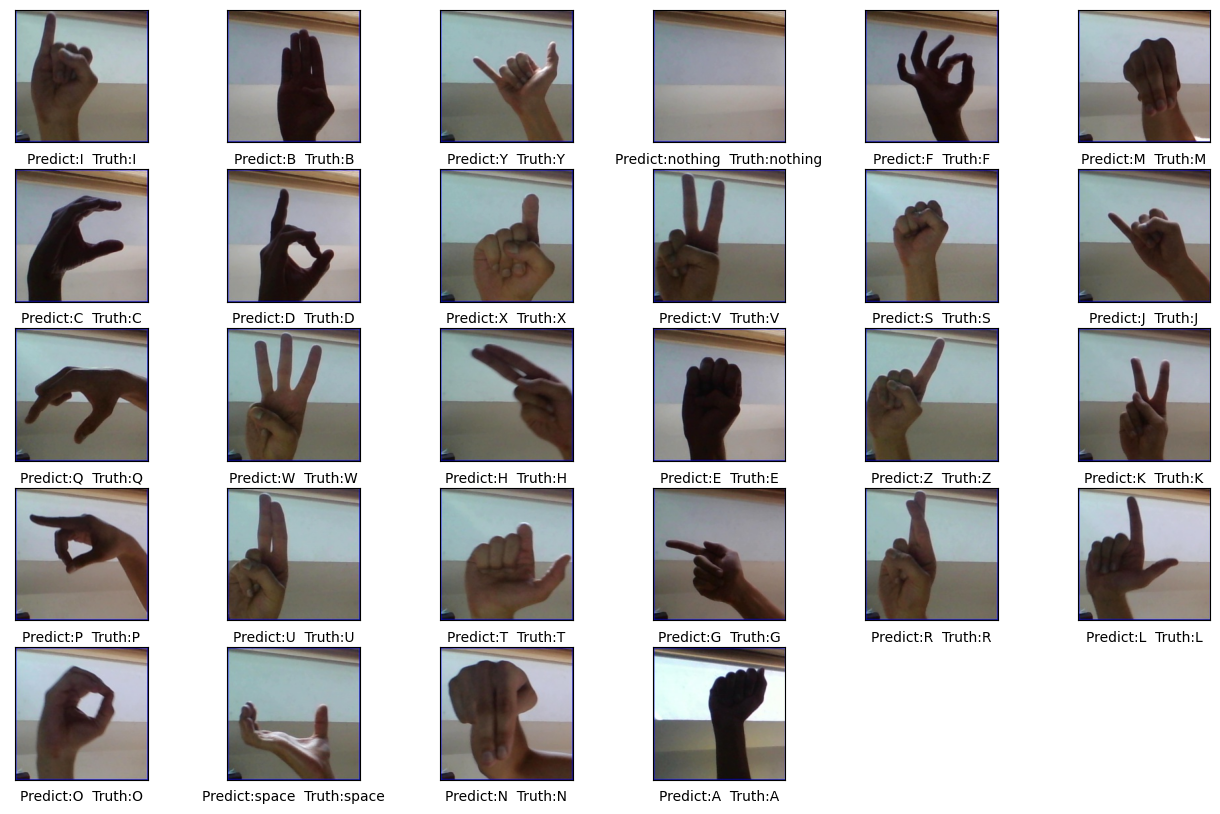

In [31]:
figure = plt.figure()
plt.figure(figsize=(16,10))

for i in range(num_test_data):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    class_index = prediction[i]
    data_class = classes[class_index]
    actual_class = actual_test_truth[i].split("_")[0]
    img_path = os.path.join(data_dir_test,actual_class+"_test"+".jpg")
    img = plt.imread(img_path)
    img = plt.imshow(img)
    actual_img = actual_test_truth[i].split('_')[0]
    x_label = "Predict:" + data_class + "  Truth:" + actual_img
    plt.xlabel(x_label)


In [32]:
prediction = model.predict(test_data[0])

1/1 [==============================] - 0s 12ms/step


In [33]:
prediction

array([[7.6337645e-38, 1.7253978e-19, 4.1383040e-34, 3.2489201e-21,
        2.4830586e-14, 3.4123251e-23, 7.2584832e-21, 4.3694897e-25,
        1.0000000e+00, 1.4584018e-32, 5.1907612e-24, 1.1918992e-31,
        1.3640284e-33, 4.3782674e-32, 5.6462584e-34, 5.7238018e-29,
        5.6444381e-38, 8.6101890e-23, 2.3658501e-30, 1.9033282e-38,
        1.4842048e-36, 9.2584824e-30, 3.5215193e-29, 1.2518065e-35,
        2.3027303e-29, 0.0000000e+00, 4.6872166e-28, 4.1237162e-32,
        3.5015791e-26]], dtype=float32)

## Saving Models

In [34]:
model.save('model_cnn_v1/model_cnn_v1')

INFO:tensorflow:Assets written to: model_cnn_v1/model_cnn_v1/assets


INFO:tensorflow:Assets written to: model_cnn_v1/model_cnn_v1/assets
